# Dataset

## Unzip dei file

In [1]:
import os
import gzip

In [12]:
# Specify the folder path where your files are located
folder_path = './Dataset ML/'
dest_path = './Data/'

# Get a list of all files in the folder
files = os.listdir(folder_path)
# [file for file in files], [file.endswith('.nii.gz') for file in files]

(['.ipynb_checkpoints',
  'sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz',
  'sub-01_ses-perceptionTraining01_task-perception_run-01_events.tsv',
  'sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii.gz',
  'sub-01_ses-perceptionTraining01_task-perception_run-02_events.tsv',
  'sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii',
  'sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii.gz',
  'sub-01_ses-perceptionTraining01_task-perception_run-03_events.tsv'],
 [False, True, False, True, False, False, True, False])

In [18]:
# Iterate through the files in the folder
for file in files:
    if file.endswith('.nii.gz'):
        gz_file_path = os.path.join(folder_path, file)
        unzipped_file_path = os.path.splitext(gz_file_path)[0]  # Remove .gz extension


        unzipped_file_path = dest_path + file.rsplit('.', 1)[0]
        print(unzipped_file_path)
        
        with gzip.open(gz_file_path, 'rb') as gz_file, open(unzipped_file_path, 'wb') as unzipped_file:
            unzipped_file.write(gz_file.read())
        print(f"Unzipped {file} to {unzipped_file_path}")

./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii
Unzipped sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz to ./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii
./Data/sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii
Unzipped sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii.gz to ./Data/sub-01_ses-perceptionTraining01_task-perception_run-02_bold.nii
./Data/sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii
Unzipped sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii.gz to ./Data/sub-01_ses-perceptionTraining01_task-perception_run-03_bold.nii


## Apertura file .nii
scopo: esplorazione dati

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
img = nib.load("./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii")

In [3]:
img.shape

(64, 64, 50, 178)

### Image Data

In [4]:
# Access the data in the .nii file
data = img.get_fdata()

# You can now work with the data as a NumPy array
# For example, you can print its shape
print("Shape of the data:", data.shape)

# You can also access header information
header = img.header
print("Header information:", header)

Shape of the data: (64, 64, 50, 178)
Header information: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  64  64  50 178   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 3. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 13 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.001362934
quatern_c       : -0.05821373
quatern_d       : 0.9980623
qoffset_x       : 10

TypeError: Invalid shape (64, 64, 50, 178) for image data

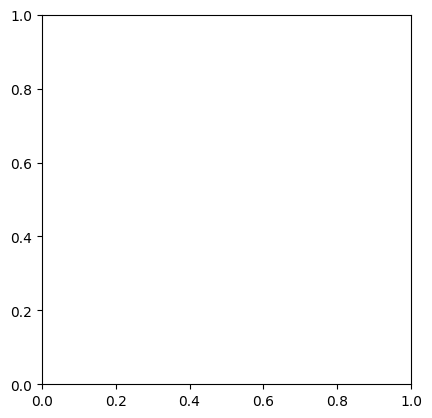

In [31]:
# Display the image using Matplotlib
plt.imshow(data[:, :, 0], cmap='gray')  # You may need to adjust the slicing [:, :, 0]
plt.title('NIfTI Image')
plt.colorbar()
plt.show()

### Function to visualize
one image for each plane (X, Y, Z)

In [137]:
def show_slice(data, time_point, slice_x, slice_y, slice_z):

    # Choose the slice indices you want to display
    time_point = 0  # Choose a time point (e.g., 0-177 in your case)
    slice_x = 32  # Choose a slice in the X dimension (0-63 in your case)
    slice_y = 32  # Choose a slice in the Y dimension (0-63 in your case)
    slice_z = 25  # Choose a slice in the Z dimension (0-49 in your case)
    
    # Display slices from different dimensions
    plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.imshow(data[:, :, slice_z, time_point], cmap='gray')
    plt.title(f'Slice in Z at index {slice_z}')
    
    plt.subplot(132)
    plt.imshow(data[:, slice_y, :, time_point], cmap='gray')
    plt.title(f'Slice in Y at index {slice_y}')
    
    plt.subplot(133)
    plt.imshow(data[slice_x, :, :, time_point], cmap='gray')
    plt.title(f'Slice in X at index {slice_x}')
    
    plt.tight_layout()
    plt.show()

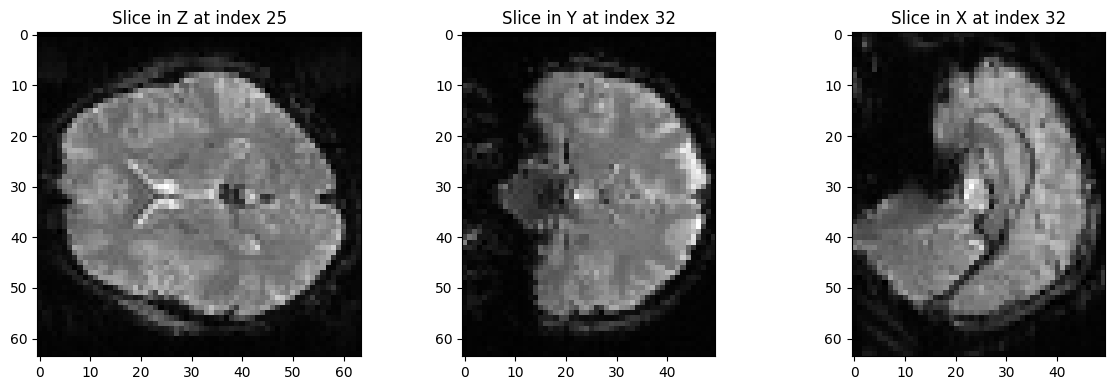

In [138]:
show_slice(data, 0, 32, 32, 25)

### Colour image

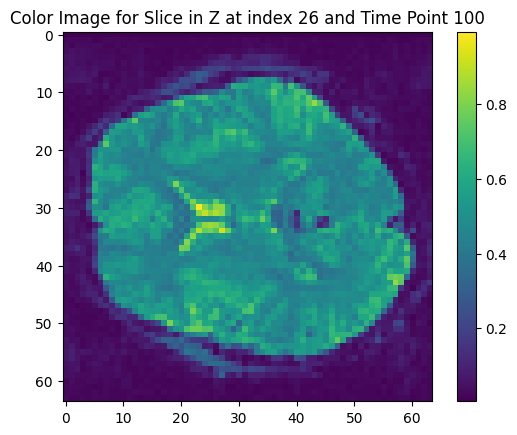

In [125]:
# Choose a time point and a slice index in the fourth and third dimensions
time_point = 100  # Choose a time point (e.g., 0-177 in your case)
slice_z = 26  # Choose a slice in the Z dimension (0-49 in your case)

# Get the 3D slice data for the chosen time point and Z slice
slice_data = data[:, :, slice_z, time_point]

# Normalize the data to the range [0, 1]
min_value = np.min(slice_data)
max_value = np.max(slice_data)
normalized_slice_data = (slice_data - min_value) / (max_value - min_value)

# Choose a colormap (e.g., 'viridis', 'hot', 'cool', etc.)
colormap = 'viridis'

# Apply the colormap to the normalized data to create an RGB image
rgb_image = plt.get_cmap(colormap)(normalized_slice_data)[:, :, :3]

# Display the RGB image
plt.imshow(rgb_image)
plt.title(f'Color Image for Slice in Z at index {slice_z} and Time Point {time_point}')
plt.colorbar()
plt.show()

## 3D Image

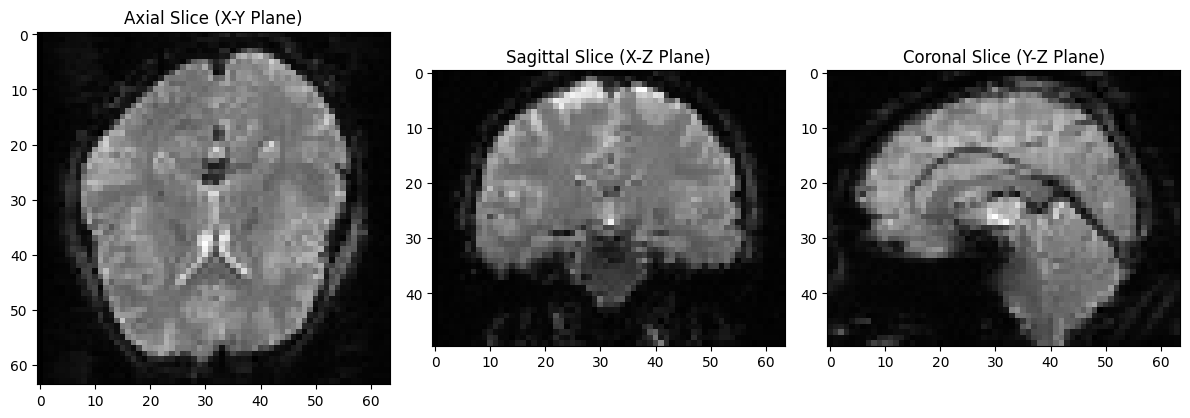

In [8]:
time_point = 0

# Create a 3D volume using data from the chosen time point
volume_data = data[:, :, :, time_point]

# Display the 3D volume as slices along different axes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display slices along the X, Y, and Z axes
axes[0].imshow(np.rot90(volume_data[:, :, volume_data.shape[2] // 2]), cmap='gray')
axes[0].set_title('Axial Slice (X-Y Plane)')

axes[1].imshow(np.rot90(volume_data[:, volume_data.shape[1] // 2, :]), cmap='gray')
axes[1].set_title('Sagittal Slice (X-Z Plane)')

axes[2].imshow(np.rot90(volume_data[volume_data.shape[0] // 2, :, :]), cmap='gray')
axes[2].set_title('Coronal Slice (Y-Z Plane)')

plt.tight_layout()
plt.show()

#### Mayavi

In [21]:
import mayavi.mlab as mlab

ModuleNotFoundError: No module named 'mayavi'

In [ ]:
# Create a Mayavi figure
mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))

# Choose a time point to visualize (e.g., 0-177 in your case)
time_point = 0

# Create a volume rendering of the data
volume = mlab.pipeline.volume(mlab.pipeline.scalar_field(data[..., time_point]))

# Customize the visualization properties
volume._volume_property.set_color(np.array([0.5, 0.5, 0.5, 1.0]))
volume._ctf.set_scale(1.0)

# Adjust the view and orientation as needed
mlab.view(azimuth=0, elevation=90, distance=300, focalpoint=(data.shape[0] / 2, data.shape[1] / 2, data.shape[2] / 2))

# Show the Mayavi visualization
mlab.show()

Note:
per installare Mayavi:
installare vtk, 'pyvista[jupyter]>=0.38.1', PyQt5

#### Plotly

In [ ]:
import plotly.graph_objects as go

# Choose a specific time point to visualize (e.g., 0-177 in your case)
time_point = 100

# Create X, Y, Z grids based on the shape of your data
X, Y, Z = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]), np.arange(data.shape[2]))

# Extract the 3D volume data at the chosen time point
values = data[:, :, :, time_point]

# Create a Plotly figure with a volume rendering
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    isomin=np.min(values),
    isomax=np.max(values),
    opacity=0.3,  # Small opacity to see through surfaces
    surface_count=17,  # Large number for good volume rendering
))

#fig.update_layout(scene=dict(domain=dict(column=0.5, diffuse=1, fresnel=0.2)))

# Customize the Plotly figure as needed
fig.update_layout(
    title=f'3D Volume Rendering at Time Point {time_point}',
    scene=dict(aspectmode='cube'),
    scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=data.shape[0] // 2, y=data.shape[1] // 2, z=data.shape[2] // 2)),
)

# Show the interactive Plotly figure
fig.show()

In [ ]:
# altro codice
import plotly.graph_objects as go
import nibabel as nib
import numpy as np

# Specify the path to your .nii file
nii_file_path = '/path/to/your/file.nii'

# Load the .nii file
img = nib.load(nii_file_path)

# Access the image data
data = img.get_fdata()

# Create X, Y, Z grids based on the shape of your data
X, Y, Z = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]), np.arange(data.shape[2]))

# Create a Plotly figure with a volume rendering for each time point
fig = go.Figure()

for time_point in range(data.shape[3]):
    values = data[:, :, :, time_point]
    
    fig.add_trace(
        go.Volume(
            x=X.flatten(),
            y=Y.flatten(),
            z=Z.flatten(),
            value=values.flatten(),
            opacity=0.1,  # Small opacity to see through surfaces
            surface_count=17,  # Large number for good volume rendering
            name=f'Time Point {time_point}'
        )
    )

# Customize the Plotly figure as needed
fig.update_layout(
    title='4D Volume Rendering',
    scene=dict(aspectmode='cube'),
    scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=data.shape[0] // 2, y=data.shape[1] // 2, z=data.shape[2] // 2)),
    updatemenu=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                                                method='animate',
                                                                args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True, mode='immediate')]),
                                               dict(label='Pause',
                                                    method='animate',
                                                    args=[None, [None], dict(mode='immediate')])])],
    sliders=[dict(active=0, yanchor='top', xanchor='left', currentvalue=dict(prefix='Time Point: ', visible=True, xanchor='right'),
                  pad=dict(b=10, t=50), len=0.9, steps=[dict(args=[f'Time Point {i}'], label=f'{i}', method='animate') for i in range(data.shape[3])])]
)

# Show the interactive Plotly animation
fig.show()


## Apertura file .tsv

In [24]:
import pandas as pd

In [22]:
# Copia i file .tsv nella cartella Data
!cp ./Dataset\ ML/*.tsv ./Data/

In [28]:
df = pd.read_csv('./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_events.tsv', sep='\t', header=0)

### Esplorazione

In [29]:
df.head(5)

,onset,duration,trial_no,event_type,stimulus_id,stimulus_name,category_index,image_index,response_time
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN
1,33,9,2,stimulus,2.766534e+06,n02766534_15976,41.0,324.0,NaN
2,42,9,3,stimulus,1.970164e+06,n01970164_28566,17.0,134.0,NaN
3,51,9,4,stimulus,4.376876e+06,n04376876_11868,127.0,1011.0,NaN
4,60,9,5,stimulus,4.225987e+06,n04225987_6665,117.0,934.0,NaN


In [31]:
# Dati sulla durata dell'evento "scansione"
np.unique(df["duration"], return_counts=True)
# il 6 e il 33 appaiono una volta ciascuno. il 33 all'inizio, il 6?

(array([ 6,  9, 33]), array([ 1, 55,  1]))

In [50]:
# l'ultimo record: evento dura 6 secondi
print(
    df["duration"].tail(5), 
    #df.tail(2)
)

52    9
53    9
54    9
55    9
56    6
Name: duration, dtype: int64


In [49]:
df.tail(1) # è di tipo rest anche l'ultimo

,onset,duration,trial_no,event_type,stimulus_id,stimulus_name,category_index,image_index,response_time
56,528,6,57,rest,NaN,NaN,NaN,NaN,NaN


**Nota:** per questo sample, la durata delle scansioni è di 9 secondi

### Controllo sugli indici
image_index del file sub-01_...run-01_events.tsv e images_training_id.csv

In [58]:
events = df
imgs = pd.read_csv("./images/images/image_training_id.csv")

In [61]:
imgs.head(5)

,1518878.010042,n01518878_10042.JPEG
0,1.518878e+06,n01518878_12028.JPEG
1,1.518878e+06,n01518878_14075.JPEG
2,1.518878e+06,n01518878_14910.JPEG
3,1.518878e+06,n01518878_5958.JPEG
4,1.518878e+06,n01518878_7346.JPEG


In [65]:
# add header
imgs.columns = ["stimulus_id", "stimulus_name_jpeg"]
# in alternativa: pd.read_csv(..., names = ["stimulus_id", "stimulus_name"])

In [73]:
# nuova colonna a partire da stimulus_name_jpeg senza .jpeg nel record

imgs.insert(2, "stimulus_name", imgs["stimulus_name_jpeg"].str[:-5])
# alternative: 
#  new_col = [x[:-5] for x in imgs["stimulus_name_jpeg"]]
#  imgs.insert(3, "stimulus_name_lol", new_col)

In [95]:
imgs.index

RangeIndex(start=0, stop=1199, step=1)

In [82]:
imgs.head(5)

,stimulus_id,stimulus_name_jpeg,stimulus_name
0,1.518878e+06,n01518878_12028.JPEG,n01518878_12028
1,1.518878e+06,n01518878_14075.JPEG,n01518878_14075
2,1.518878e+06,n01518878_14910.JPEG,n01518878_14910
3,1.518878e+06,n01518878_5958.JPEG,n01518878_5958
4,1.518878e+06,n01518878_7346.JPEG,n01518878_7346


In [83]:
df = events.merge(imgs, left_on='stimulus_name', right_on='stimulus_name')[['trial_no', 'stimulus_name']]

In [84]:
df.head(5)

,trial_no,stimulus_name
0,2,n02766534_15976
1,3,n01970164_28566
2,4,n04376876_11868
3,5,n04225987_6665
4,6,n03079230_8270


In [88]:
df.index # 56 record -> OK (il trial_no = 1 e -1 non sono presi perché di tipo rest)

RangeIndex(start=0, stop=55, step=1)

In [89]:
events.index # infatti ha 58 record

RangeIndex(start=0, stop=57, step=1)

In [94]:
# how many images in the training folder?
! ls -l ./images/images/training | wc -l
# output: 1200 immagini, la prima riga è un output di ls

1201


**Cosa sappiamo**
+ questo file .nii (...run01.nii) ha 56 record
+ le immagini di training sono 1200
+ ci sono 10 file .nii

**Dubbio**
Questo ci porta a un totale di 560 record, o scansioni, ciascuna relativa a una immagine.
Dove sono le altre?

**Ipotesi**
Ci sono tre cartelle per il sub01, quindi: 1200 / 3 = 400 immagini per cartella, circa 40 per file.nii

In [105]:
for i in range(len(data)):
    try:
        if np.unique(data[i]) != 0.:
            pass
    except:
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [108]:
np.unique(data[2]) #!= 0.

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
       80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 92., 95.])

In [117]:
len(data[:20, :5, :32, 177])

20

In [118]:
# Nota:
# provare a confrontare scansioni, vedere la differenza (dove è maggiore)
# Ragionamento: se un trial dura 9, allora contiene più scansioni, che saranno simili fra loro

In [119]:
events

,onset,duration,trial_no,event_type,stimulus_id,stimulus_name,category_index,image_index,response_time
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN
1,33,9,2,stimulus,2.766534e+06,n02766534_15976,41.0,324.0,NaN
2,42,9,3,stimulus,1.970164e+06,n01970164_28566,17.0,134.0,NaN
3,51,9,4,stimulus,4.376876e+06,n04376876_11868,127.0,1011.0,NaN
4,60,9,5,stimulus,4.225987e+06,n04225987_6665,117.0,934.0,NaN
5,69,9,6,stimulus,3.079230e+06,n03079230_8270,57.0,456.0,NaN
6,78,9,7,stimulus,3.079230e+06,n03079230_8270,57.0,456.0,79.034210
7,87,9,8,stimulus,3.394916e+06,n03394916_23304,67.0,530.0,NaN
8,96,9,9,stimulus,1.877134e+06,n01877134_11991,14.0,111.0,NaN
9,105,9,10,stimulus,3.924679e+06,n03924679_11429,102.0,809.0,NaN


In [121]:
np.unique(events.duration, return_counts=True)

(array([ 6,  9, 33]), array([ 1, 55,  1]))

In [ ]:
time_points e duration dello stimolo
11 -> 33
2 -> 6
3 time_points -> 9

In [ ]:
# vedi video vsauce: brain imaging

## Allineamento scansioni Array-CSV

In [176]:
import nibabel as nib
import numpy as np

In [177]:
img = nib.load("./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii")
data = img.get_fdata()

### 1. Approccio statico
Dimensione della finestra è fissa

In [146]:
# Define the window size (3 time points)
window_size = 3

# Calculate the number of windows
num_windows = data.shape[3] // window_size

In [147]:
# Initialize an array to store the summed data
summed_data = np.zeros(data.shape[:3] + (num_windows,))
summed_data.shape # summed_data ha le prime tre dimensioni uguali a data;
                  # e l'ultima che deriva dal numero di finestre
                  # domanda: perché è scritto così (num_windows, ) ?

(64, 64, 50, 59)

In [ ]:
# Sum the data for every 3 time points
for i in range(num_windows):
    time_window = data[:, :, :, i * window_size : (i + 1) * window_size]
    summed_data[:, :, :, i] = np.mean(time_window, axis=3)

# You can also calculate the average by replacing np.sum with np.mean

# Save the summed data as a new NIfTI file
# summed_img = nib.Nifti1Image(summed_data, img.affine)
# nib.save(summed_img, '/path/to/summed_data.nii')

In [141]:
#show_slice(summed_data, 0, 0, 0, 0)
summed_data.shape

(64, 64, 50, 59)

### 2. Approccio Dinamico
Dimensione della finestra in base al campo *duration* del dataframe delle scansioni

In [178]:
data.shape

(64, 64, 50, 178)

In [197]:
durations = events["duration"] # estrae una Series di Pandas
# ogni elemento diviso 3, perchè 3 time_points = 9 sec
durations = [ x // 3 for x in durations ] # diventa una lista, ogni elemento è una window_size

In [218]:
# num_windows equivale a #record nel csv scansioni, o len(durations) ovvero il numero di finestre!
num_windows = len(durations)

(array([ 2,  3, 11]), array([ 1, 55,  1]))

In [249]:
# Initialize an array to store the summed data
summed_data = np.zeros(data.shape[:3] + (num_windows, ))

# Sum the data for every x time points, for x in durations
for window_size, i in zip(durations, range(num_windows)):

    # Take every scan, also rest events
    time_window = data[:, :, :, i * window_size : (i + 1) * window_size]
    summed_data[:, :, :, i] = np.mean(time_window, axis=3)

In [250]:
summed_data.shape

(64, 64, 50, 57)

In [251]:
# adesso, confrontando con il csv, possiamo togliere le scansioni che corrispondono a rest

In [269]:
cropped_data = summed_data
mask = np.ndarray(shape = cropped_data.shape[3], dtype=bool) # di tipo bool o np.int32 (dove 1 = True e 0 = False)
mask.shape

(57,)

In [270]:
for i in range(events.shape[0]): # per ogni record
    mask[i] = events.loc[i, "event_type"] == "rest"

# Alternativa: iterrows
# 
# for index, row in events.iterrows():
#     if row["event_type"] == "rest":
#         print("rest")

(array([False,  True]), array([55,  2]))

In [271]:
print("Conteggio di mask", np.unique(mask, return_counts=True))
# elimina eventi "rest" nelle scansioni
cropped_data = np.delete(arr = cropped_data, obj = mask, axis = 3)
print("Cropped_data shape: ", cropped_data.shape)

Conteggio di mask (array([False,  True]), array([55,  2]))
Cropped_data shape:  (64, 64, 50, 55)


## Feature-Target
Creazione coppia scansione-immagine

In [272]:
scans = cropped_data # array scansioni

In [298]:
events.reset_index(drop=True, inplace=True) # reset index, parte di nuovo da 0, drop=True non aggiunge il vecchio indice come new column
stimulus = events # csv scansioni

In [299]:
# Filtro CSV scansioni: elimina record di tipo "rest"
index_events = stimulus[ (stimulus['event_type'] == 'rest') ].index
stimulus.drop(index_events , inplace=True) # drop delle rows in base all'indice
stimulus.tail()
# come è fatto index_events?

,onset,duration,trial_no,event_type,stimulus_id,stimulus_name,category_index,image_index,response_time
50,483,9,52,stimulus,2.439033e+06,n02439033_11666,33.0,257.0,NaN
51,492,9,53,stimulus,7.734744e+06,n07734744_8048,144.0,1151.0,NaN
52,501,9,54,stimulus,4.587559e+06,n04587559_10400,140.0,1113.0,NaN
53,510,9,55,stimulus,2.800213e+06,n02800213_4703,44.0,351.0,NaN
54,519,9,56,stimulus,4.482393e+06,n04482393_6359,137.0,1096.0,NaN


In [290]:
# scans = ndarray di scansioni;
# stimulus = csv delle scansioni, comprende nomi delle imgs target

In [325]:
import os
import tensorflow as tf
from keras.utils import load_img, img_to_array
from tensorflow.data import Dataset

In [345]:
def data_generator():

    path_to_imgs = "./images/images/training/"
    img_height = 64
    img_width = 64
    
    for i in range(stimulus.shape[0]):
    
        img_filename = stimulus.loc[i, "stimulus_name"]
        
        for root, _, files in os.walk(path_to_imgs):
            if img_filename + ".JPEG" in files:
                
                img = load_img(
                    root + img_filename + ".JPEG",
                    color_mode='grayscale',
                    target_size= (img_height, img_width), # img originale ha shape (500, 500, 3)
                    interpolation='nearest'
                )
                
                img_arr = img_to_array(img) 
                # print(f"File {img_filename} found in {root}")
                # print(img_arr.shape) # (64, 64, 1)
    
                yield scans[..., i], img_arr
                # yield scans[..., i], np.array([img_arr]) # img come batch

In [347]:
next(data_generator())[1].shape

(1, 64, 64, 1)

In [357]:
dataset = Dataset.from_generator(
    generator=lambda: data_generator(),
    output_signature=(
        tf.TensorSpec(shape=[64, 64, 50]), # come è fatto il valore che ritorna il generatore (h x w x z)
        tf.TensorSpec(shape=[64, 64, 1])
    ) # 2 TensorSpec perché data_generator() ritorna due valori: feature e target
)

In [358]:
dataset = dataset.shuffle(buffer_size=1_000).batch(128)

## Rete

In [350]:
from keras import Sequential
from keras.layers import Conv3D, Conv3DTranspose

In [351]:
# fully convolutional neural network (UNET)

fcnn = Sequential(
    [
        Conv3D(filters=64, kernel_size=3, padding="same", strides=2, activation="relu"),
        Conv3D(filters=64, kernel_size=3, padding="same", activation="relu"),
        Conv3D(filters=128, kernel_size=3, padding="same", strides=2, activation="relu"),
        Conv3D(filters=128, kernel_size=3, padding="same", activation="relu"),
        Conv3D(filters=256, kernel_size=3, padding="same", strides=2, activation="relu"),
        Conv3D(filters=256, kernel_size=3, padding="same", activation="relu"),

        Conv3DTranspose(filters=256, kernel_size=3, padding="same", activation="relu"),
        Conv3DTranspose(filters=256, kernel_size=3, padding="same", strides=2, activation="relu"),
        Conv3DTranspose(filters=128, kernel_size=3, padding="same", activation="relu"),
        Conv3DTranspose(filters=128, kernel_size=3, padding="same", strides=2, activation="relu"),
        Conv3DTranspose(filters=64, kernel_size=3, padding="same", activation="relu"),
        Conv3DTranspose(filters=64, kernel_size=3, padding="same", strides=2, activation="relu"),

        Conv3D(filters=1, kernel_size=3, padding="same")
    ]
)

Note sull'architettura FullyConv.
https://www.andreaprovino.it/fcn e https://www.redhotcyber.com/rubriche/alla-scoperta-dellintelligenza-artificiale/

In [352]:
fcnn.build(input_shape=[32, 64, 64, 50, 1])

In [353]:
fcnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_7 (Conv3D)           (32, 32, 32, 25, 64)      1792      
                                                                 
 conv3d_8 (Conv3D)           (32, 32, 32, 25, 64)      110656    
                                                                 
 conv3d_9 (Conv3D)           (32, 16, 16, 13, 128)     221312    
                                                                 
 conv3d_10 (Conv3D)          (32, 16, 16, 13, 128)     442496    
                                                                 
 conv3d_11 (Conv3D)          (32, 8, 8, 7, 256)        884992    
                                                                 
 conv3d_12 (Conv3D)          (32, 8, 8, 7, 256)        1769728   
                                                                 
 conv3d_transpose_6 (Conv3DT  (32, 8, 8, 7, 256)      

## Training

In [354]:
from keras.optimizers import Adam
from keras.losses import MeanSquaredError # è un compito di regressione, prevedere il valore di ogni pixel (in grayscale)
from keras.metrics import MeanAbsoluteError

In [355]:
fcnn.compile(
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metrics=MeanAbsoluteError()
)

In [1]:
AUTOTUNE = tf.data.AUTOTUNE

dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'tf' is not defined

In [ ]:
fcnn.fit(x = dataset, initial_epoch=0, epochs = 1)

2023-10-15 15:29:31.943981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-15 15:29:31.944780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-15 15:29:40.556488: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 360448000 exceeds 10% of free system memory.
2023-10-15 15:29:41.047628: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 360448000 exceeds 10% of free system memory.
2023-10-15 15:29:43.597646: W tensorflow/tsl/framework/cpu_allocator

In [129]:
# funzione
def imageVSbrain(test, df, number4D, number3D=25):
    duration = 0
    duration = int(duration)
    print(test.shape)
    brain = test[:, :, :, number4D]
    number = number4D*3
    print("number: ", number)
    for l in range(df.shape[0]):
        dura = df["duration"][int(l)]
        dura = int(dura)
        duration = duration + dura
        if duration >= number:
            id_image = df["stimulus_name"][l]
            print("fuuuuu: ", id_image)
            break
    print("duration: ", duration)
    del df
    del test
    images = "./Data/images/images/training"
    for root, dirs, files in os.walk(images):
        for file in files:
            if file.startswith(id_image):
                print("file: ", file)
                # return a numpy image
                image_np = plt.imread(os.path.join(root, file))
                break
    return image_np, brain

In [132]:
# 
# pathBrain = fr"C:\Users\StefanoCarobene\Desktop\appunti\DeepLearning_Project\data\sub-01\ses-perceptionTraining.npy"
pathBrain = "./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii"
#test = np.load(pathBrain)
test = data
cccc = 0
ccccc = 0
#64*64*50*batch_size
# pathCSV = fr"c:\Users\StefanoCarobene\Desktop\appunti\DeepLearning_Project\data\sub-01\ses-perceptionTraining.csv"
pathCSV = "./Data/sub-01_ses-perceptionTraining01_task-perception_run-01_events.tsv"
df = pd.read_csv(pathCSV, index_col=False, sep=",")
images = np.zeros((64, 64, 3, test.shape[3]), dtype=np.float32)
brains = np.zeros((64, 64, 50, test.shape[3]), dtype=np.float32)
for x in range(test.shape[3]-1):
    try:
        image, brain = imageVSbrain(test, df, x)
        
        # Resize the image to (64, 64) with RGB channels preserved
        image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
    except:
        print("error")
        ccccc += 1
        image = [0, 0, 0]

    cccc += 1
    images[:, :, :, x] = image
    brains[:, :, :, x] = brain

(64, 64, 50, 178)
number:  0
error


NameError: name 'brain' is not defined